<a href="https://colab.research.google.com/github/OleksiiLozovyi/goit-ds-hw-13/blob/main/Hw13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [31]:
x_train = np.stack([x_train, x_train, x_train], axis=-1)
x_test = np.stack([x_test, x_test, x_test], axis=-1)

In [32]:
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [33]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [36]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_base.trainable = False

In [37]:
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 815s 1s/step - accuracy: 0.5647 - loss: 3.9681 - val_accuracy: 0.7847 - val_loss: 0.6200
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.7364 - loss: 0.7414 - val_accuracy: 0.8079 - val_loss: 0.5378
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 751s 999ms/step - accuracy: 0.7716 - loss: 0.6323 - val_accuracy: 0.8198 - val_loss: 0.4976
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 808s 1s/step - accuracy: 0.7911 - loss: 0.5617 - val_accuracy: 0.8296 - val_loss: 0.4765
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 853s 1s/step - accuracy: 0.8030 - loss: 0.5369 - val_accuracy: 0.8323 - val_loss: 0.4639
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 748s 994ms/step - accuracy: 0.8087 - loss: 0.5224 - val_accuracy: 0.8315 - val_loss: 0.4663
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 787s 974ms/step - accuracy: 0.8134 - loss: 0.5032 - val_accuracy: 0.8380 - val_loss: 0.4496
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 791s 1s/step - accuracy: 0.8177 - loss: 0.4901 -

In [40]:
vgg_base.trainable = True
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history_finetune = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2634s 4s/step - accuracy: 0.8389 - loss: 0.4439 - val_accuracy: 0.8627 - val_loss: 0.3885
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2763s 4s/step - accuracy: 0.8629 - loss: 0.3664 - val_accuracy: 0.8707 - val_loss: 0.3751
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2801s 4s/step - accuracy: 0.8731 - loss: 0.3396 - val_accuracy: 0.8782 - val_loss: 0.3492
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2629s 3s/step - accuracy: 0.8833 - loss: 0.3038 - val_accuracy: 0.8813 - val_loss: 0.3349
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2641s 4s/step - accuracy: 0.8944 - loss: 0.2803 - val_accuracy: 0.8840 - val_loss: 0.3372


In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 124s - 398ms/step - accuracy: 0.8823 - loss: 0.3511
Test accuracy: 0.8823000192642212


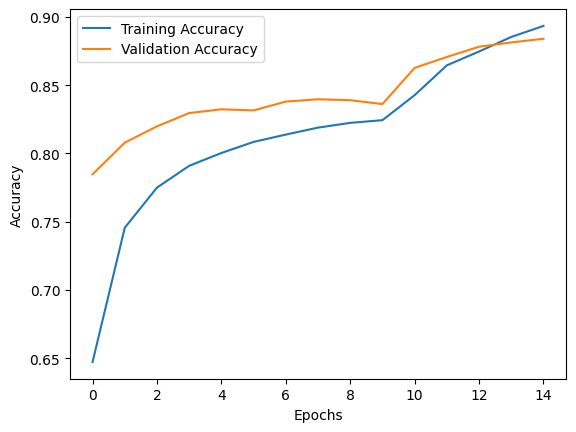

In [45]:
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

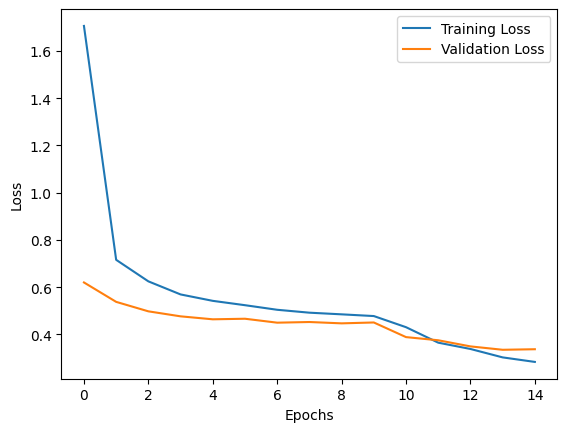

In [46]:
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
print("Використання VGG16 у якості основи дозволяє досягти вищої точності завдяки попередньо натренованим ознакам.")

Використання VGG16 у якості основи дозволяє досягти вищої точності завдяки попередньо натренованим ознакам.
